### pytorch拟合曲线 0.5*x*x

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# 生成数据  设置随机数生成器的种子为0，以确保每次运行代码时生成的随机数相同。这对于重现实验结果非常重要。
np.random.seed(0)
x = np.linspace(-3, 3, 100)  #生成一个包含100个均匀分布的数值的数组，从-3到3。x 代表自变量。
y = 0.5 * x** 3 +x+ np.random.normal(0, 0.5, x.shape)
#y = np.sin(x) + np.random.normal(0, 0.5, x.shape)
x.shape, x

((100,),
 array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
        -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
        -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
        -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
        -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
        -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
        -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
        -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
        -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
        -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
         0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
         0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
         0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
         0.93939394,  1.        ,  1.06060

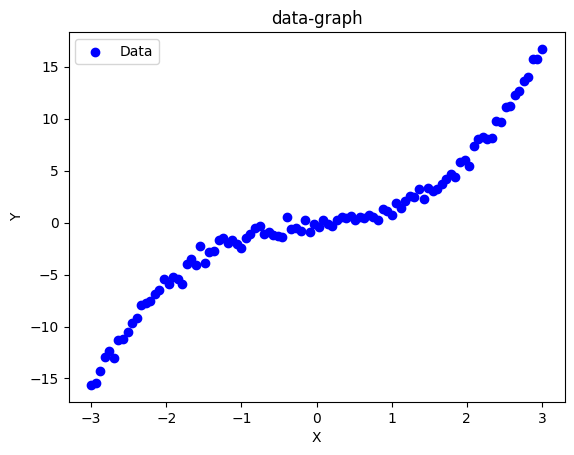

In [10]:
plt.scatter(x, y, label='Data', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('data-graph')
plt.show()

In [11]:
x_tensor = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)  # 将numpy数组转化为张量  100*1
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
x_tensor,y_tensor  # 100个样本

(tensor([[-3.0000],
         [-2.9394],
         [-2.8788],
         [-2.8182],
         [-2.7576],
         [-2.6970],
         [-2.6364],
         [-2.5758],
         [-2.5152],
         [-2.4545],
         [-2.3939],
         [-2.3333],
         [-2.2727],
         [-2.2121],
         [-2.1515],
         [-2.0909],
         [-2.0303],
         [-1.9697],
         [-1.9091],
         [-1.8485],
         [-1.7879],
         [-1.7273],
         [-1.6667],
         [-1.6061],
         [-1.5455],
         [-1.4848],
         [-1.4242],
         [-1.3636],
         [-1.3030],
         [-1.2424],
         [-1.1818],
         [-1.1212],
         [-1.0606],
         [-1.0000],
         [-0.9394],
         [-0.8788],
         [-0.8182],
         [-0.7576],
         [-0.6970],
         [-0.6364],
         [-0.5758],
         [-0.5152],
         [-0.4545],
         [-0.3939],
         [-0.3333],
         [-0.2727],
         [-0.2121],
         [-0.1515],
         [-0.0909],
         [-0.0303],


In [14]:
# 定义模型类
class QuadraticModel(nn.Module):
    def __init__(self):
        super(QuadraticModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),  # 非线性激活函数的意义非凡 形成曲线
            nn.Dropout(0.2), # 暂退层 随机丢取20%的神经元 增强学习随机性 防止过拟合
            nn.Linear(10, 1) # 10表示中间经过10个神经网络
        )
    def forward(self, x):
        return self.model(x)


# 实例化模型、损失函数和优化器
model = QuadraticModel()
criterion = nn.MSELoss()  # 平均损失函数
# 两种优化器
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay=0.001) # weight_decay代表权重衰减算法 增加惩罚项可以防止权重过大，使得模型变化更加平缓

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # 清空梯度
    y_pred = model(x_tensor)  # 前向传播 计算模型预测值
    loss = criterion(y_pred, y_tensor)  # 计算损失值
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
# 可视化结果
model.eval()

with torch.no_grad():
    y_fit = model(x_tensor)

y_fit,y_fit.numpy()

Epoch [100/1000], Loss: 3.3536
Epoch [200/1000], Loss: 3.1885
Epoch [300/1000], Loss: 2.8808
Epoch [400/1000], Loss: 4.4533
Epoch [500/1000], Loss: 2.6635
Epoch [600/1000], Loss: 2.6656
Epoch [700/1000], Loss: 2.7499
Epoch [800/1000], Loss: 3.7505
Epoch [900/1000], Loss: 2.0803
Epoch [1000/1000], Loss: 2.3221


(tensor([[-14.2835],
         [-13.7982],
         [-13.3129],
         [-12.8276],
         [-12.3423],
         [-11.8570],
         [-11.3717],
         [-10.8864],
         [-10.4011],
         [ -9.9158],
         [ -9.4305],
         [ -8.9452],
         [ -8.4599],
         [ -7.9746],
         [ -7.4893],
         [ -7.0040],
         [ -6.5187],
         [ -6.0334],
         [ -5.5481],
         [ -5.0628],
         [ -4.5775],
         [ -4.0922],
         [ -3.6940],
         [ -3.4502],
         [ -3.2063],
         [ -2.9624],
         [ -2.7186],
         [ -2.4747],
         [ -2.2309],
         [ -1.9870],
         [ -1.7431],
         [ -1.6339],
         [ -1.5357],
         [ -1.4272],
         [ -1.2988],
         [ -1.1705],
         [ -1.0674],
         [ -1.0373],
         [ -1.0071],
         [ -0.9696],
         [ -0.9069],
         [ -0.8443],
         [ -0.7816],
         [ -0.7189],
         [ -0.6562],
         [ -0.5936],
         [ -0.5309],
         [ -0

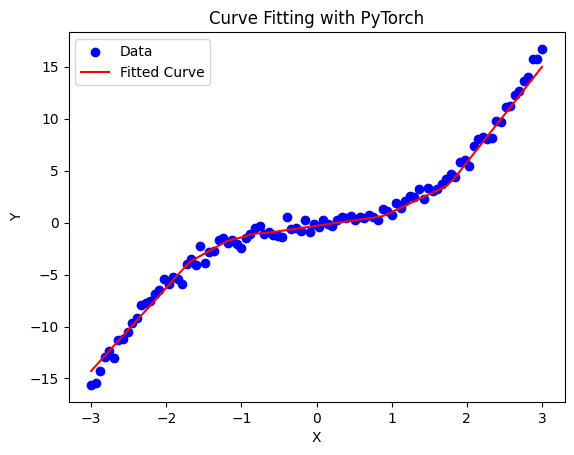

In [15]:
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, y_fit.numpy(), label='Fitted Curve', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Curve Fitting with PyTorch')
plt.show()